In [1]:
# импортируем необходимые библиотеки:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

# Анализ продаж интернет-магазина "Стримчик"

Цель проекта -  выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Этапы исследования:

1. загрузка данных;
2. предобработка данных;
3. исследовательский анализ данных;
4. составление портрета пользователя каждого региона;
5. проверка гипотез.

Описание данных:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Загрузка данных

In [2]:
# читаем файл:
data = pd.read_csv('/datasets/games.csv')

In [3]:
# выведем первые 10 строчек датафрейма:
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# выведем ощую информацию о датафрейме:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

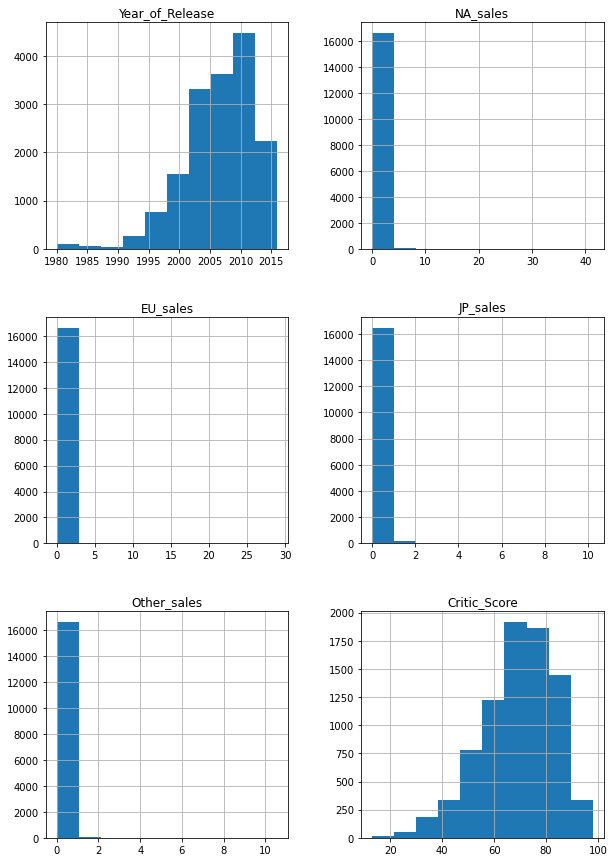

In [5]:
# построим общую гистограмму для всех числовых столбцов:
data.hist(figsize=(10, 15))

### Вывод по пункту 1:
* Датафрейм содержит 11 столбцов и 16715 строк. 
* Есть пропущенные значения в столбцах: Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. 
* Тип данных в столбцах: вещественные числа и строки.
* Данные предоставлены с 1980 г по 2016г.

## Предобработка данных

### Для удобства, приведем названия столбцов к нижнему регистру:

In [6]:
data.columns = data.columns.str.lower()

# проверим результат:
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков

#### Выведем все пропуски в столбцах:

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### Вычислим, какой процент занимают пропущенные значения

In [8]:
# напишем функцию, для вычисления процентного соотношения пропущенных значений в столбце:
def missing_value (column):
    result = round(column.isna().sum()/len(data)*100, 1)
    return result

In [9]:
print('Процент пропущенных значений:')
print('name:', missing_value(data['name']))
print('year_of_release:', missing_value(data['year_of_release']))
print('genre:', missing_value(data['genre']))
print('critic_score:', missing_value(data['critic_score']))
print('user_score:', missing_value(data['user_score']))
print('rating:', missing_value(data['rating']))

Процент пропущенных значений:
name: 0.0
year_of_release: 1.6
genre: 0.0
critic_score: 51.3
user_score: 40.1
rating: 40.5


1. По полученным рассчетам видно, что процент пропущенных значений в столбцах 'name' и 'genre' минимальный. Следовательно, данные пропуски можно будет удалить. Скорее всего пропуски в данных столбцах вохникли из-за технической ошибки.

2. Процент пропущенных значений в столбце 'year_of_release' также крайне низкий. Эти пропуски можно будет либо удалить, либо оставить, если они не будут мешать дальнейшему анализу. Пропущенные значения в данном столбце могли появится в результате технической ошибки, или в связи с тем, что определенная игра в была выпущена на разных платформах в разное время.

3. Процент пропущенных значений в столбцах 'critic_score', 'user_score', 'rating' очень высокий (больше 40). Следовательно эти пропуски удалять нельзя, также, их не стоит заменять средним или медианным значением, так как заполнение этой информации может исказить расчет корреляции. Пропуски в данных столбцах могли возникнуть в результате того, что игры вышли совсем недавно и рейтинг еще не подсчитан, либо игры были выпущены слишком дано и их невозможно оценить. Также пропуски могли возникнуть в результате технической ошибки.

#### Изучим пропуски в столбцах name и genre:

In [10]:
# выведем пропуски столбца name:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
# выведем пропуски столбца genre:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в данных столбцах находятся в одинаковых строках. Данные строки являются неинформативными, так как содержат большое количество пропусков и данных строк всего две, поэтому их можно удалить.

#### Удалим строки с пропусками в столбце name:

In [12]:
data = data.dropna(subset=['name']).reset_index(drop=True)

# проверим результат:
data['name'].isna().sum()

0

#### Изучим подробнее пропуски в столбце 'year_of_release' :

In [13]:
data[data['year_of_release'].isna()].head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
718,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Пропуски не повлияют на дальнейший анализ, можно их оставить.

#### Изучим столбцы 'critic_score', 'user_score', 'rating' . Посмотрим, нет ли там нестандартных значений:

In [14]:
# выведем уникальные значения столбца 'critic_score':
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [15]:
# выведем уникальные значения столбца 'user_score':
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим нестандартное значение 'tbd'. TBD — это аббревиатура, которая обозначает «To Be Determined» (англ. «будет определено»). Это выражение используется в различных областях и означает, что некоторые детали еще не известны или не определены. Следовательно, данным значением были заполнены пропуски. Заменим это значение на NaN:

In [16]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [17]:
# проверим результат:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [18]:
# выведем уникальные значения столбца 'rating':
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

#### Проверим, что все возможные пропуски были удалены:

In [19]:
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

### Пребразуем типы данных в столбцах:
* year_of_release в цельночисленный формат;
* user_score в тип данных float (для возможности выполнения математических операций);


In [20]:
# приведем year_of_release в цельночисленный формат: 
data['year_of_release'] = data['year_of_release'].astype('Int64')

# проверим результат:
data['year_of_release'].dtypes

Int64Dtype()

In [21]:
# приведем user_score в тип данных float:
data['user_score'] = pd.to_numeric(data['user_score'])

# проверим результат:
data['user_score'].dtypes

dtype('float64')

### Посчитаем суммарные продажи во всех регионах  и запишем данные в новый столбец 'general sales':

In [22]:
data['general_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [23]:
# проверим результат:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Проверим нет ли явных дубликатов:

In [24]:
data.duplicated().sum()

0

### Выясним, есть ли неявные дубликаты. Проверим по имени, платформе и году релиза. Если таковые имеются - удалим.

In [25]:
data.duplicated(['name', 'platform', 'year_of_release']).sum()

1

In [26]:
data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### Вывод по пункту 2
В результате предварительной обработки данных были выполнены следующие изменения:

1. названия столбцов приведены к нижнему регистру;
1. удалены пропуски в столбцах 'name' и 'genre';
1. пропуски в столбце 'year_of_release' были оставлены, так как они не мешают дальнейшему анализу;
1. в столбце 'user_score' нестандартное значение 'tbd' заменено на NaN;
1. пропуски в столбцах 'critic_score', 'user_score' и 'rating' оставлены, так как процентное соотношение пропущенных значений очень высокое (более 40%), и при их заполнений можно исказить расчет корреляции;
1. преобразован тип данных в стобцах: year_of_release в цельночисленный формат; user_score в тип данных float;
1. подсчитаны суммарные продажи во всех регионах и данные занесены в новый столбец 'general sales'. 



## Исследовательский анализ данных

### Изучим, сколько игр выпускалось в разные годы. 


#### Выведем минимальное и максимальное значения столбца 'year_of_release', чтобы понимать, данные за какой период времени у нас есть:

In [27]:
print('Год релиза самых старых игр:', data['year_of_release'].min())
print('Год релиза самых новых игр:', data['year_of_release'].max())

Год релиза самых старых игр: 1980
Год релиза самых новых игр: 2016


#### Сделаем сводную таблицу, в которой сгруппируем данные по годам и подсчитаем количество выпущенных игр.

In [93]:
sum_games_by_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
sum_games_by_year.head()

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


In [29]:
# переименуем столбец 'name':
sum_games_by_year = sum_games_by_year.rename(columns={'name': 'number_of_games'})

#### Построим столбчатую диаграмму:

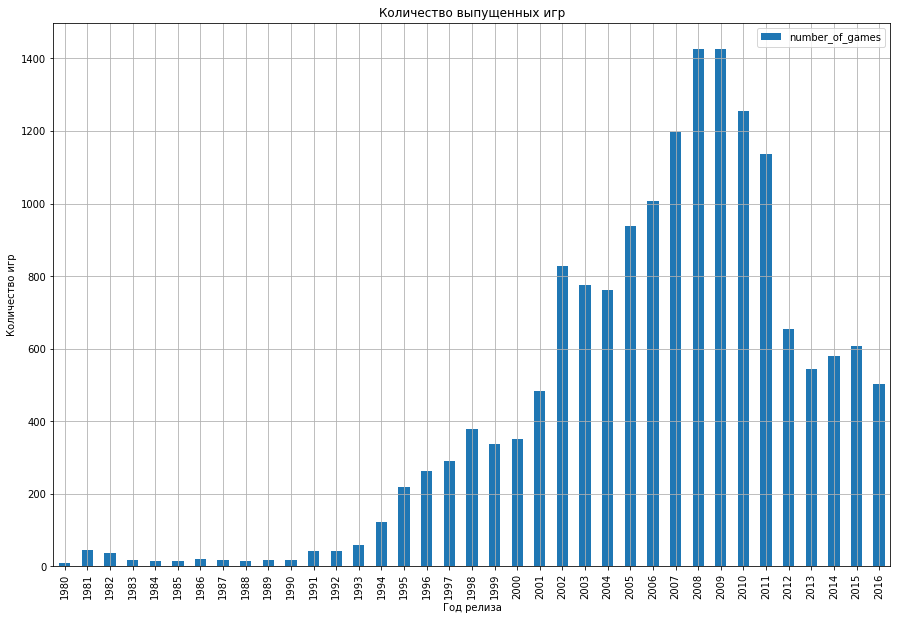

In [30]:
sum_games_by_year.plot(kind='bar',  figsize=(15, 10), title = 'Количество выпущенных игр', grid='True')
plt.xlabel('Год релиза')
plt.ylabel('Количество игр')
plt.show()

#### Вывод:
Мы имеем данные об играх, выпущенных с 1980 по 2016 год:

* С 2002 года происходит резкое увеличение количества выпускаемых игр. Что, вероятно, связано с развитием технологий. 
* Наибольшее количество игр выпущено с 2005 по 2011 год (более 1000 игр в год). Пик приходится на 2008 и 2009 год (1427 и 1426 игр в год).
* После 2011 года происходит резкий спад количества выпущенных игр в год (653 игры в 2012, по сравнению с 1136 играми в 2011 году).
* Можно не рассматривать данные до 2002 года, так как количество выпущенных игр в год было крайне мало (менее 500 в год). Также можно не рассматривать данные за 2016 год, так как указано, что данные за этот год неполные.


### Изучим, как менялись продажи по платформам. 
Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Высяним, за какой характерный срок появляются новые и исчезают старые платформы.

#### Сформируем сводную таблицу, в которой сгруппируем данные по платформам и подсчитаем их суммарные продажи:

In [92]:
top_sales_platform = data.pivot_table(index='platform', values='general_sales', aggfunc='sum')\
                    .sort_values(by='general_sales', ascending=False)
top_sales_platform.head()

,general_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


#### Для визуализации  построим столбчатую диаграмму:

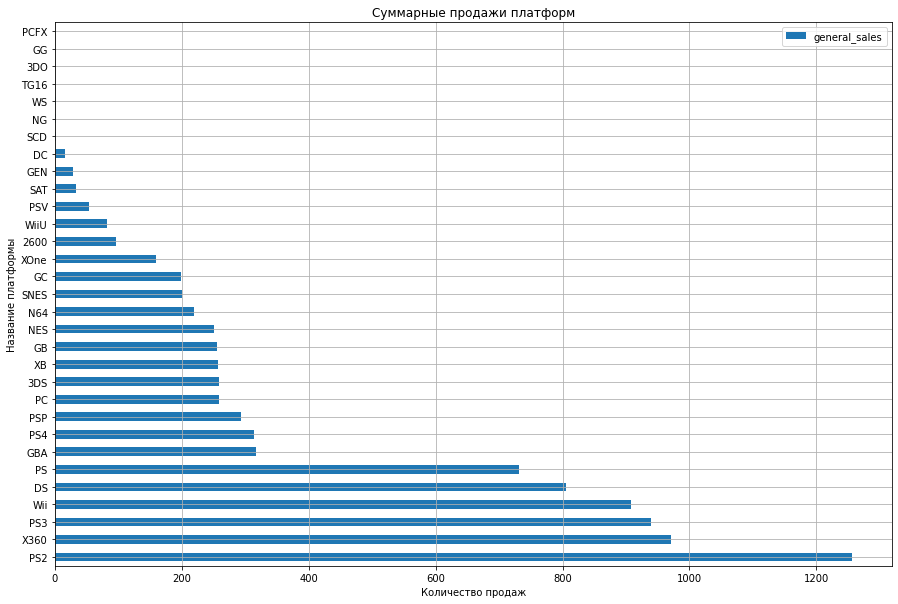

In [32]:
top_sales_platform.plot(kind='barh',  figsize=(15, 10), title = 'Суммарные продажи платформ', grid='True')
plt.xlabel('Количество продаж')
plt.ylabel('Название платформы')
plt.show()

#### Выделим ТОП-10 платформ:

In [33]:
top_10_platform = top_sales_platform.head(10)
top_10_platform

,general_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


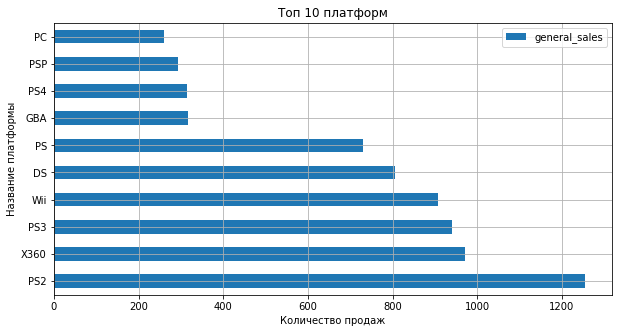

In [34]:
top_10_platform.plot(kind='barh',  figsize=(10, 5), title = 'Топ 10 платформ', grid='True')
plt.xlabel('Количество продаж')
plt.ylabel('Название платформы')
plt.show()

#### Выявим распределение ТОП-10 платформ по годам:
* выделим ТОП-10 названий платформ в отдельный список;
* напишем цикл, который сгруппирует данные (по интересующим нас платформам) по годам и выведет диаграмму по каждой платформе

In [35]:
top_platform= ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

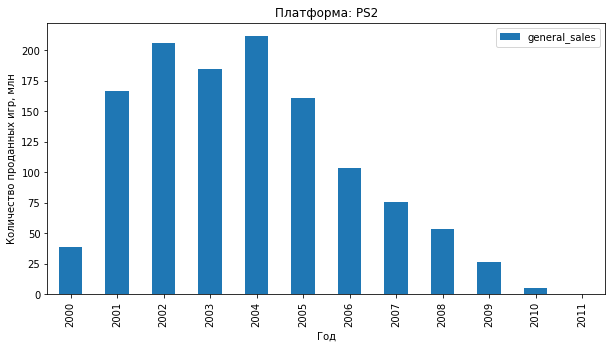

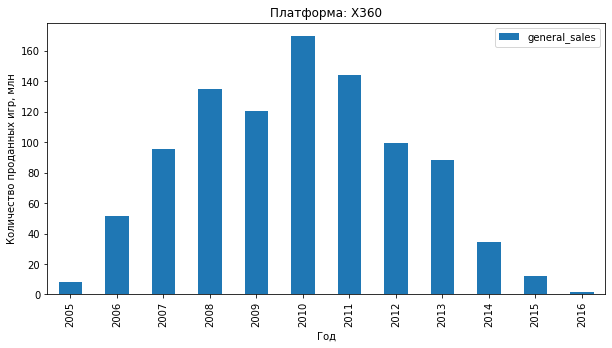

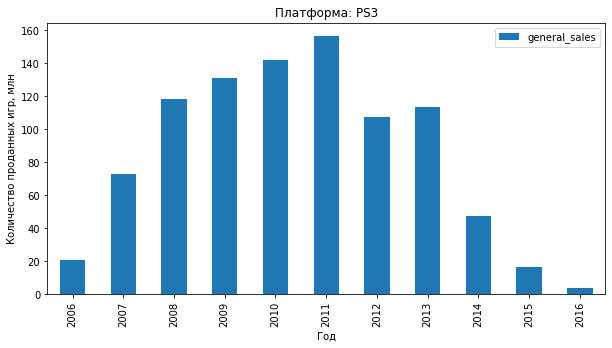

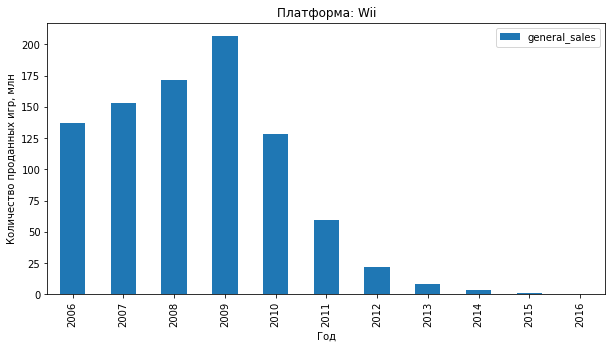

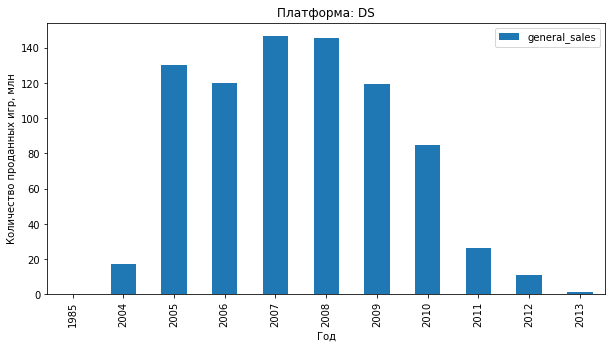

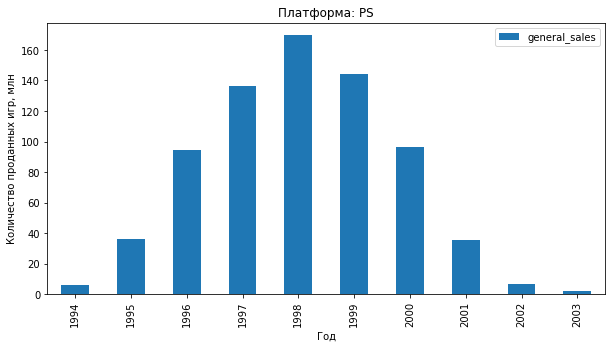

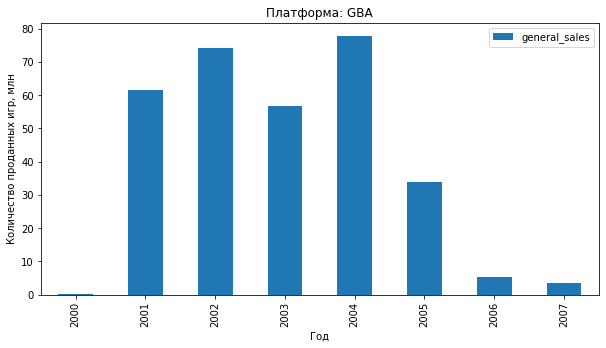

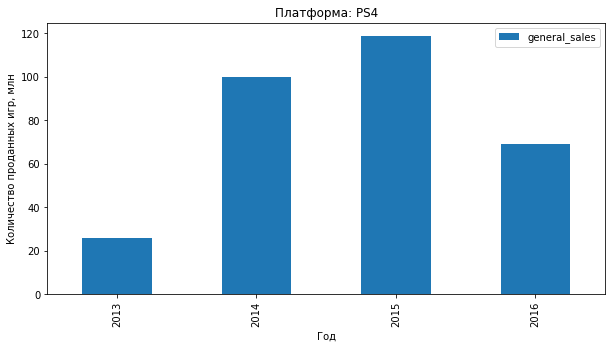

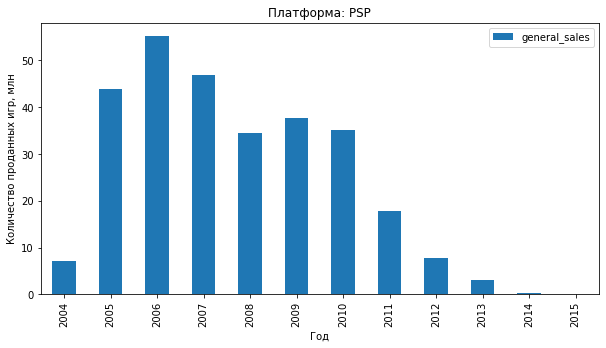

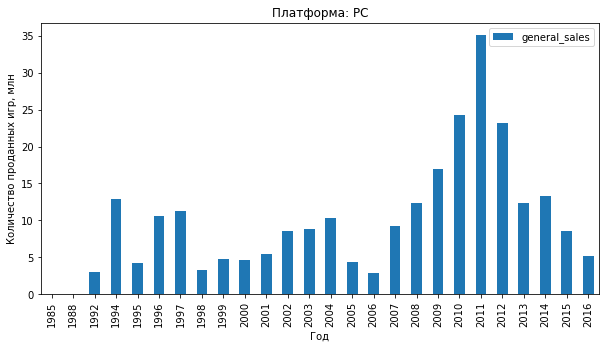

In [36]:
for platform in top_platform:
    data[data['platform'] == platform].pivot_table(index = 'year_of_release', 
                                                   values = 'general_sales', 
                                                   aggfunc = 'sum').plot(
kind = 'bar', figsize = (10,5))
    plt.title('Платформа: ' + platform)
    plt.xlabel('Год')
    plt.ylabel('Количество проданных игр, млн')
    plt.show()

#### Вывод:  
В ТОП-10 платформ, по суммарным количествам продаж входят: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC'.

По построенным графикам видно, что каждая платформа существует примерно 10 лет, исключение составляет платформа PC, игры на которой выпускаются с 1992 года по 2016 год включительно (24 года). 



### Выясним, какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

#### Определим актуальный период.
Согласно полученным ранее данным, жизненный цикл платформ составляет около 10 лет. Следовательно, данные, предотставленные за более поздний срок, являются неактуальными. Также, мы видим резкое уменьшение количества выпущенных игр после 2011 года, слeдовательно данные до 2011 года являются неактуальными для прогноза на 2017 год, так как они сильно разнятся с данными за последние 5 лет. Возьмем для анализа данные с 2012 года по 2016 год

In [37]:
actual_data = data.query('year_of_release >= 2012')
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


Вычислим, какие платформы лидируют по продажам:

In [38]:
top_actual_sales_platform = actual_data.pivot_table(index='platform', values='general_sales', aggfunc='sum')\
                    .sort_values(by='general_sales', ascending=False)
top_actual_sales_platform

,general_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


После фильтрации датафрейма по актуальному периоду видим, что платформы, показывающие успешные показатели по продажам за 2012-2016 год значительно отличаются от тех, что лидируют по продажам за все время. Раньше лидерами по продажам были PS2 и X360, в актуальном периоде на лидирующих позициях PS4 и PS3.

Сгруппируем платформы по актуальному временному периоду:

In [39]:
actual_data_sales = actual_data.pivot_table(index='year_of_release', columns='platform', values='general_sales', aggfunc='sum')
    
actual_data_sales

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Построим линейный график, чтобы определить наиболее перспективные платформы:

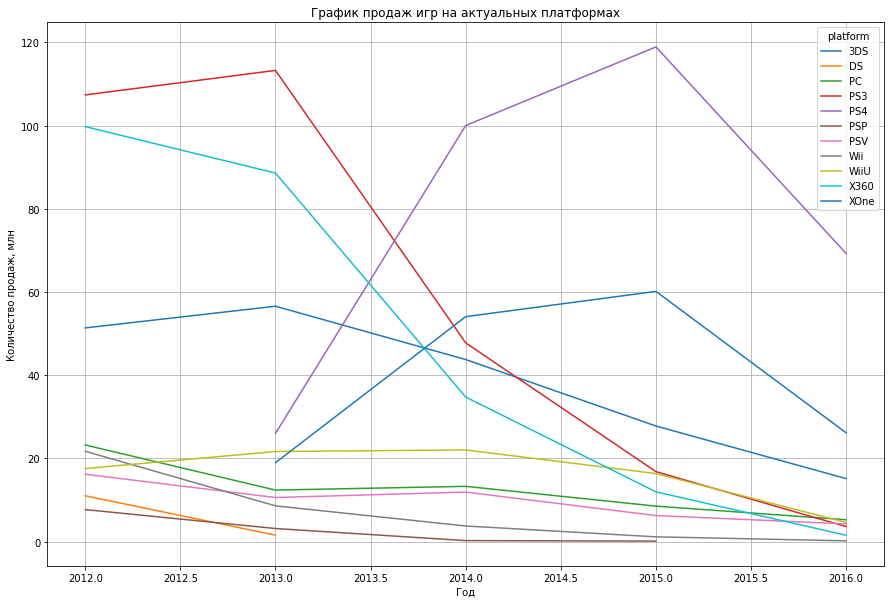

In [40]:
actual_data_sales.plot(kind='line', figsize = (15,10), grid='True')
plt.xlabel('Год')
plt.ylabel('Количество продаж, млн')
plt.title('График продаж игр на актуальных платформах')
plt.show()

#### Вывод:
По графику видим, что платформы:
* 3DC - продажи игр упали после 2013 года, на 2016 год продажи составляют около 15 млн;
* DS - в 2013 году продажи игр прекратились;
* PC - в 2012 году было продано 23 млн игр, после идет медленный спад продаж. Платформа выглядит стабильной, так как существует более 24 лет, но рост продаж маловероятен;
* PS3 - пик продаж пришелся на 2013 год (более 107 млн копий игр), после же следует резкий спад продаж в связи с тем, что данную платформу заменила PS4;
* PS4 - пик продаж в 2015(118 млн) году, на 2016 год виден спад (69 млн), но данные за 2016 год являются неполными, поэтому консоль выглядит потенциально прибыльной;
* PSP - продажи прекратились в 2015 году;
* PSV - продажи стабильно низкие (6 млн в 2015 году) и имеют постоянную тенденцию к снижению (16 млн в 2012г, 4 млн в 2016г);
* Wii - продажи в 2016 году близки к нулю (0.18 млн), платформа более не актуальна;
* X360 - после 2012 года идет резкий спад (98 млн в 2012г, 1.5 в 2016г), потеряла актуальность в связи с выходом новой версии консоли XOne;
* XOne - пик продаж в 2015 году (60 млн), данные за 2016 год неполные.

Можно выделить две наиболее перспективные платформы:
* PS4
* XOne

После фильтрации датафрейма по актуальному периоду видим, что платформы, показывающие успешные показатели по продажам за 2012-2016 год значительно отличаются от тех данных, где представлены продажи платформ за все время. Раньше лидерами по продажам были PS2 и X360, в актуальном периоде на лидирующих позициях  PS4 и PS3.

 ### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

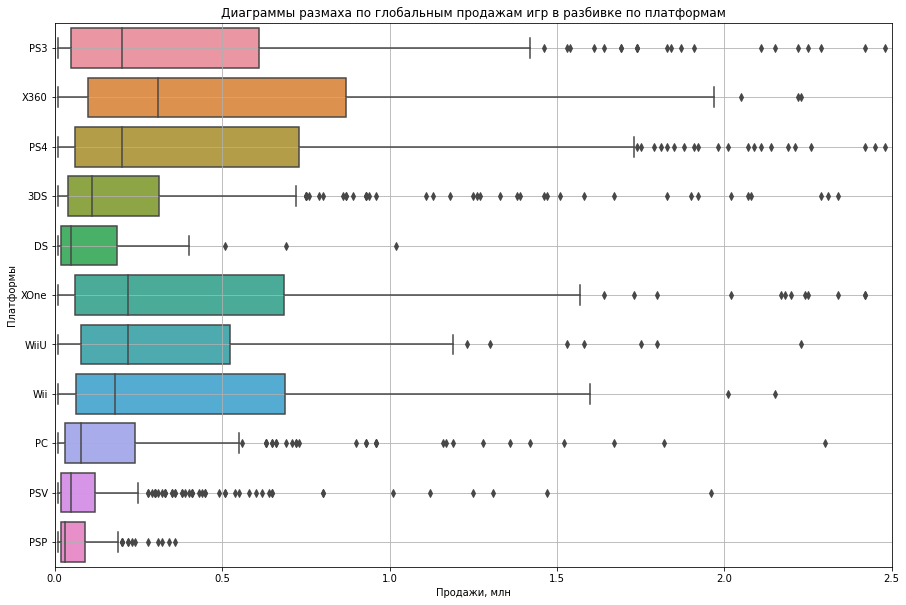

In [41]:
plt.figure(figsize=(15, 10))

sns.boxplot(data = actual_data, x='general_sales', y='platform')

plt.title('Диаграммы размаха по глобальным продажам игр в разбивке по платформам')
plt.grid('on')
plt.xlabel('Продажи, млн')
plt.ylabel('Платформы')
plt.xlim(0, 2.5)
plt.show()

In [42]:
actual_data['general_sales'].describe()

count    2886.000000
mean        0.501223
std         1.249157
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: general_sales, dtype: float64

#### Вывод:
* Видно достаточное количество выбросов у всех платформ, наименьшее количество выбросов у платформ DS и Wii.
* Наибольший размах у платформ X360, PS4, XOne, Wii.
* Медиана продаж большинства платформ (PS3, X360, PS4, XOne, WiiU, Wii) находится на примерно одном уровне (0,2 миллиона проданных копий).
* Минимальная сумма продаж - 0.01 млн.
* Максимальная - 21.05 млн.




### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

Изучим вопрос на основе продаж внутри платформы PS4


#### Отфильтруем таблицу с данными за актуальный период, выберем все строки, где в столбце 'platform' == PS4:

In [43]:
ps4 = actual_data.query('platform == "PS4"')
ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


#### Отфильтруем полученную таблицу, оставим только интересующие нас столбцы:

In [44]:
ps4 = ps4[['critic_score','user_score', 'general_sales']]
ps4.head()

,critic_score,user_score,general_sales
31,NaN,NaN,14.63
42,97.0,8.3,12.62
77,82.0,4.3,8.58
87,NaN,NaN,7.98
92,83.0,5.7,7.66


#### Выведем попарный коэффициент корреляции для всех величин с помощью матрицы корреляции:

In [45]:
ps4.corr()

,critic_score,user_score,general_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
general_sales,0.406568,-0.031957,1.000000


#### Построим диаграмму рассеяния для оценок критиков:

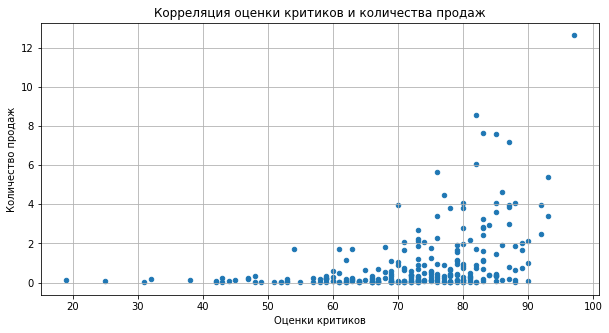

In [46]:
ps4.plot(x='critic_score', y='general_sales', kind='scatter', grid=True, figsize = (10,5))
plt.xlabel('Оценки критиков')
plt.ylabel('Количество продаж')
plt.title('Корреляция оценки критиков и количества продаж');
plt.show()

#### Построим диаграмму рассеяния для оценок пользователей:

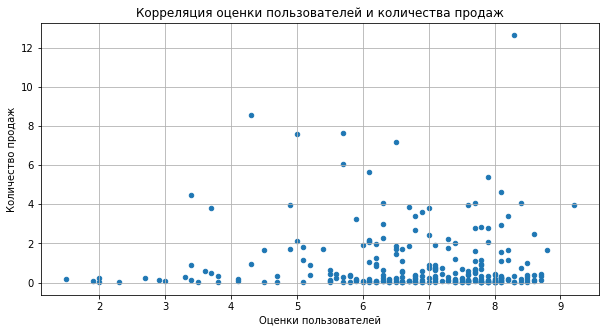

In [47]:
ps4.plot(x='user_score', y='general_sales', kind='scatter', grid=True, figsize = (10,5))
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.title('Корреляция оценки пользователей и количества продаж');
plt.show()

#### Вывод:
* Присутствует связь между оценками критиков и количеством продаж копий игр, корреляция составляет 0.4. Количество значительно увеличивается, если оценка критиков больше 70.
* Коэффициент корреляции между оценками пользователей и продажами игр равен нулю. Соответственно, мнение пользователей не оказывает особенного влияния на количество продаж.

### Рассчитаем корреляцию для других платформ


#### Рассчитаем коэффициент корреляции для платформы PS3:

In [48]:
ps3 = actual_data.query('platform == "PS3"')
ps3 = ps3[['critic_score','user_score', 'general_sales']]
ps3.corr()

,critic_score,user_score,general_sales
critic_score,1.000000,0.539456,0.331497
user_score,0.539456,1.000000,-0.005144
general_sales,0.331497,-0.005144,1.000000


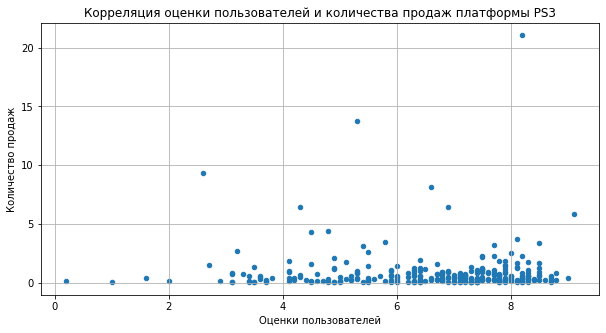

In [49]:
ps3.plot(x='user_score', y='general_sales', kind='scatter', grid=True, figsize = (10,5))
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.title('Корреляция оценки пользователей и количества продаж платформы PS3');
plt.show()

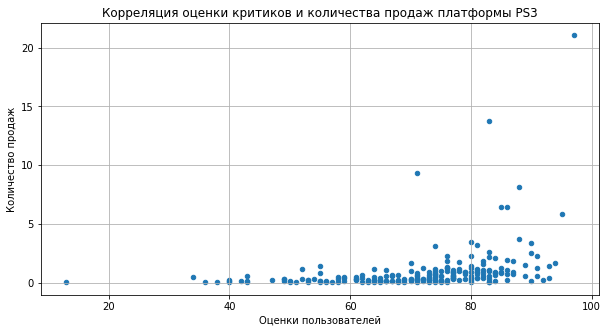

In [50]:
ps3.plot(x='critic_score', y='general_sales', kind='scatter', grid=True, figsize = (10,5))
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.title('Корреляция оценки критиков и количества продаж платформы PS3');
plt.show()

#### Рассчитаем коэффициент корреляции для платформы X360:

In [51]:
x360 = actual_data.query('platform == "X360"')
x360 = x360[['critic_score','user_score', 'general_sales']]
x360.corr()

,critic_score,user_score,general_sales
critic_score,1.000000,0.557352,0.360573
user_score,0.557352,1.000000,0.006164
general_sales,0.360573,0.006164,1.000000


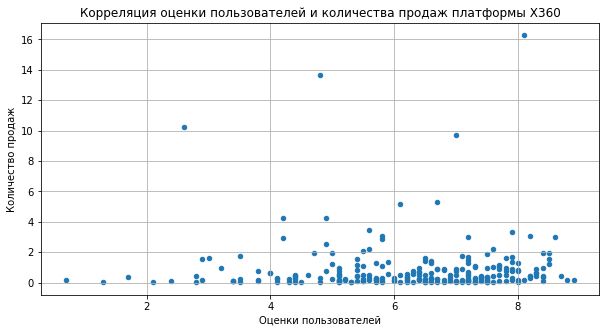

In [52]:
x360.plot(x='user_score', y='general_sales', kind='scatter', grid=True, figsize = (10,5))
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.title('Корреляция оценки пользователей и количества продаж платформы X360');
plt.show()

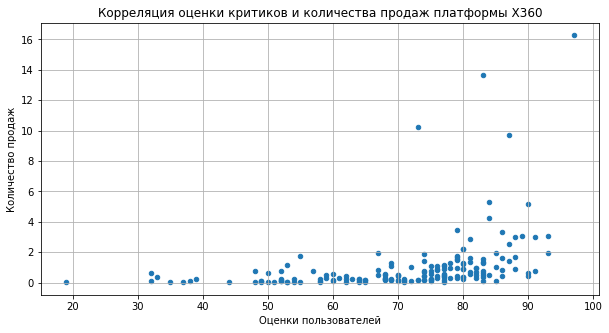

In [53]:
x360.plot(x='critic_score', y='general_sales', kind='scatter', grid=True, figsize = (10,5))
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.title('Корреляция оценки критиков и количества продаж платформы X360');
plt.show()

#### Рассчитаем коэффициент корреляции для платформы 3DS:

In [54]:
ds3 = actual_data.query('platform == "3DS"')
ds3 = ds3[['critic_score','user_score', 'general_sales']]
ds3.corr()

,critic_score,user_score,general_sales
critic_score,1.000000,0.722762,0.320803
user_score,0.722762,1.000000,0.197583
general_sales,0.320803,0.197583,1.000000


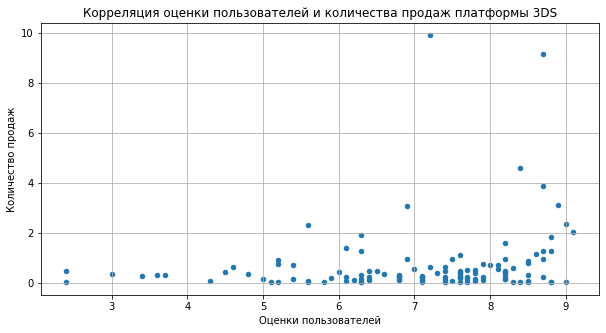

In [55]:
ds3.plot(x='user_score', y='general_sales', kind='scatter', grid=True, figsize = (10,5))
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.title('Корреляция оценки пользователей и количества продаж платформы 3DS');
plt.show()

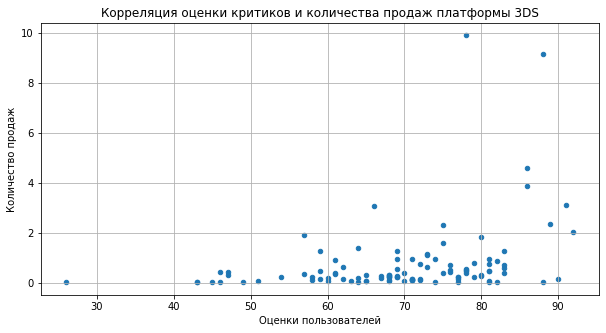

In [56]:
ds3.plot(x='critic_score', y='general_sales', kind='scatter', grid=True, figsize = (10,5))
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.title('Корреляция оценки критиков и количества продаж платформы 3DS');
plt.show()

#### Рассчитаем коэффициент корреляции для платформы XOne:

In [57]:
xone = actual_data.query('platform == "XOne"')
xone = xone[['critic_score','user_score', 'general_sales']]
xone.corr()

,critic_score,user_score,general_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
general_sales,0.416998,-0.068925,1.000000


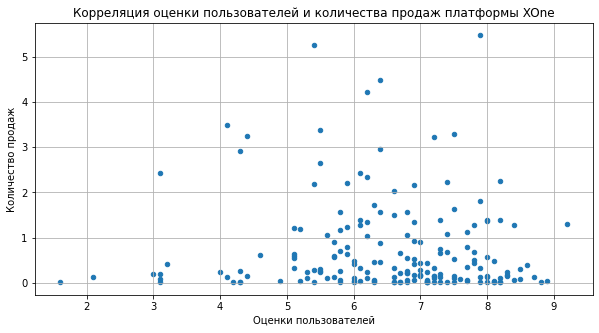

In [58]:
xone.plot(x='user_score', y='general_sales', kind='scatter', grid=True, figsize = (10,5))
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.title('Корреляция оценки пользователей и количества продаж платформы XOne');
plt.show()

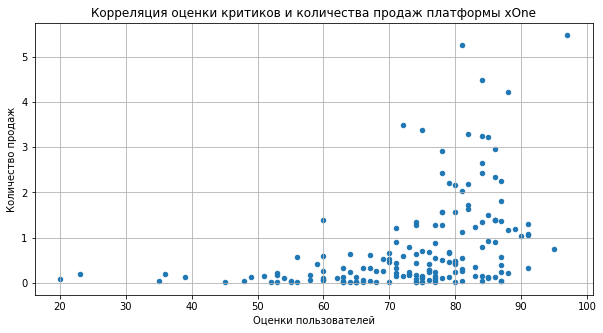

In [59]:
xone.plot(x='critic_score', y='general_sales', kind='scatter', grid=True, figsize = (10,5))
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.title('Корреляция оценки критиков и количества продаж платформы xOne');
plt.show()

#### Рассчитаем коэффициент корреляции для платформы WiiU:

In [60]:
wiiu = actual_data.query('platform == "WiiU"')
wiiu = wiiu[['critic_score','user_score', 'general_sales']]
wiiu.corr()

,critic_score,user_score,general_sales
critic_score,1.00000,0.770080,0.348380
user_score,0.77008,1.000000,0.400219
general_sales,0.34838,0.400219,1.000000


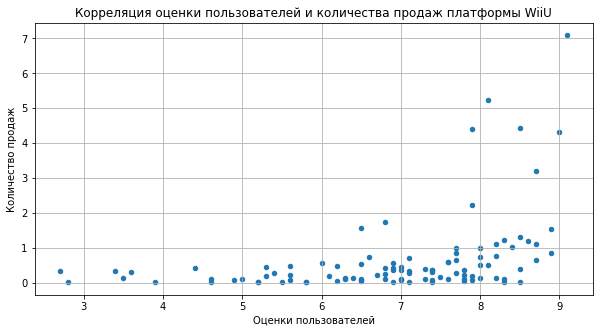

In [61]:
wiiu.plot(x='user_score', y='general_sales', kind='scatter', grid=True, figsize = (10,5))
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.title('Корреляция оценки пользователей и количества продаж платформы WiiU');
plt.show()

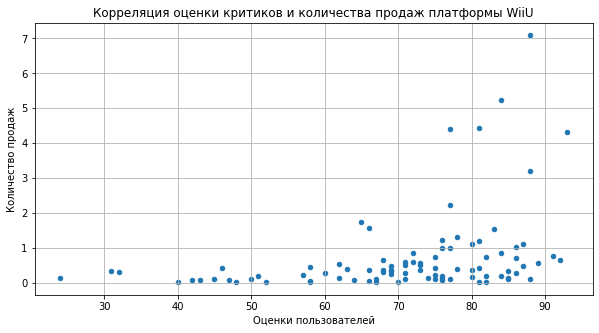

In [62]:
wiiu.plot(x='critic_score', y='general_sales', kind='scatter', grid=True, figsize = (10,5))
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.title('Корреляция оценки критиков и количества продаж платформы WiiU');
plt.show()

#### Рассчитаем коэффициент корреляции для платформы PC:

In [63]:
pc = actual_data.query('platform == "PC"')
pc = pc[['critic_score','user_score', 'general_sales']]
pc.corr()

,critic_score,user_score,general_sales
critic_score,1.000000,0.432587,0.237243
user_score,0.432587,1.000000,-0.121867
general_sales,0.237243,-0.121867,1.000000


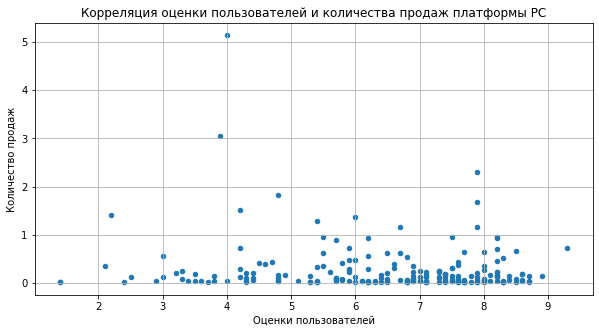

In [64]:
pc.plot(x='user_score', y='general_sales', kind='scatter', grid=True, figsize = (10,5))
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.title('Корреляция оценки пользователей и количества продаж платформы PC');
plt.show()

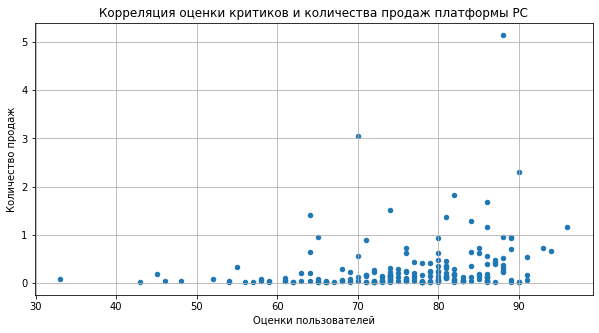

In [65]:
pc.plot(x='critic_score', y='general_sales', kind='scatter', grid=True, figsize = (10,5))
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.title('Корреляция оценки критиков и количества продаж платформы PC');
plt.show()

#### Рассчитаем коэффициент корреляции для платформы PSV:

In [66]:
psv = actual_data.query('platform == "PSV"')
psv = psv[['critic_score','user_score', 'general_sales']]
psv.corr()

,critic_score,user_score,general_sales
critic_score,1.000000,0.699199,0.094488
user_score,0.699199,1.000000,-0.004339
general_sales,0.094488,-0.004339,1.000000


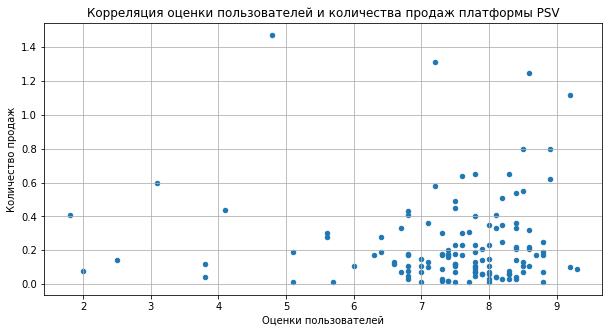

In [67]:
psv.plot(x='user_score', y='general_sales', kind='scatter', grid=True, figsize = (10,5))
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.title('Корреляция оценки пользователей и количества продаж платформы PSV');
plt.show()

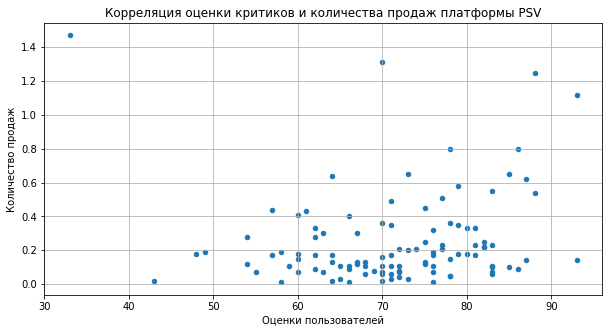

In [68]:
psv.plot(x='critic_score', y='general_sales', kind='scatter', grid=True, figsize = (10,5))
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.title('Корреляция оценки критиков и количества продаж платформы PSV');
plt.show()

#### Рассчитаем коэффициент корреляции для платформы Wii:

In [69]:
wii = actual_data.query('platform == "Wii"')
wii = wii[['critic_score','user_score', 'general_sales']]
wii.corr()

,critic_score,user_score,general_sales
critic_score,1.000000,0.816295,-0.424341
user_score,0.816295,1.000000,0.296197
general_sales,-0.424341,0.296197,1.000000


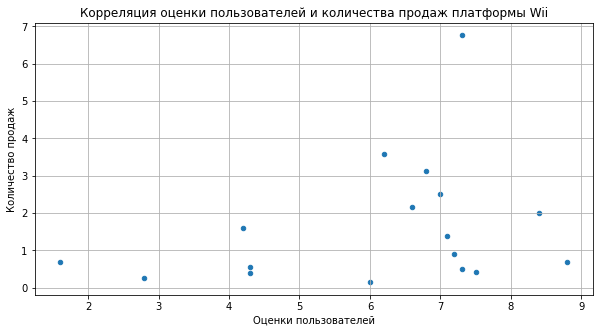

In [70]:
wii.plot(x='user_score', y='general_sales', kind='scatter', grid=True, figsize = (10,5))
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.title('Корреляция оценки пользователей и количества продаж платформы Wii');
plt.show()

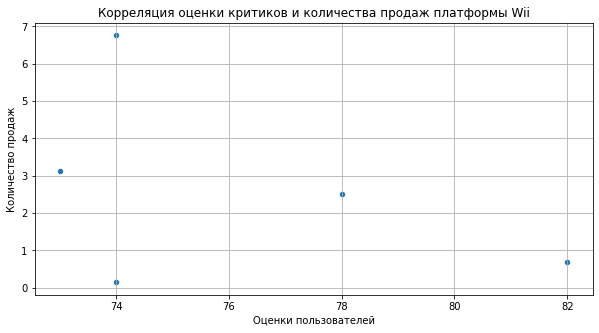

In [71]:
wii.plot(x='critic_score', y='general_sales', kind='scatter', grid=True, figsize = (10,5))
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.title('Корреляция оценки критиков и количества продаж платформы Wii');
plt.show()

#### Рассчитаем коэффициент корреляции для платформы DS:

In [72]:
ds = actual_data.query('platform == "DS"')
ds = ds[['critic_score','user_score', 'general_sales']]
ds.corr()

,critic_score,user_score,general_sales
critic_score,NaN,NaN,NaN
user_score,NaN,1.000000,0.882709
general_sales,NaN,0.882709,1.000000


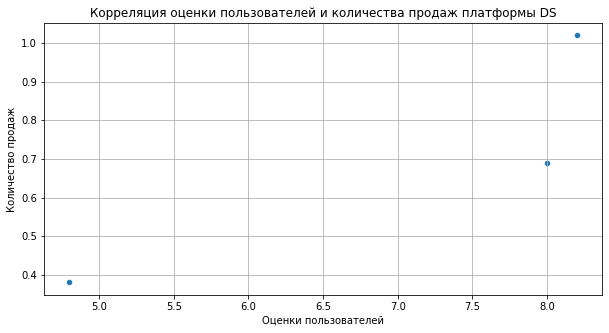

In [73]:
ds.plot(x='user_score', y='general_sales', kind='scatter', grid=True, figsize = (10,5))
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.title('Корреляция оценки пользователей и количества продаж платформы DS');
plt.show()

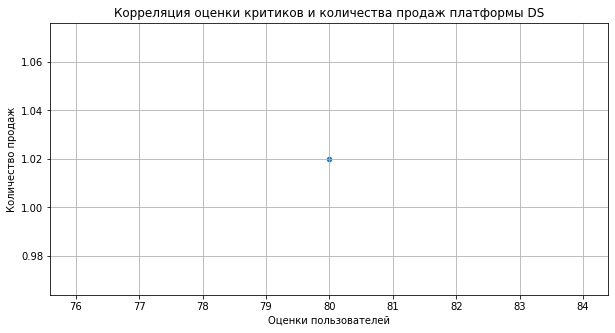

In [74]:
ds.plot(x='critic_score', y='general_sales', kind='scatter', grid=True, figsize = (10,5))
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.title('Корреляция оценки критиков и количества продаж платформы DS');
plt.show()

#### Рассчитаем коэффициент корреляции для платформы PSP:

In [75]:
psp = actual_data.query('platform == "PSP"')
psp = psp[['critic_score','user_score', 'general_sales']]
psp.corr()

,critic_score,user_score,general_sales
critic_score,NaN,NaN,NaN
user_score,NaN,1.000000,-0.802302
general_sales,NaN,-0.802302,1.000000


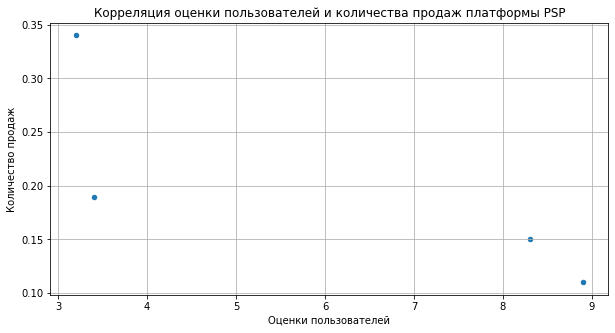

In [76]:
psp.plot(x='user_score', y='general_sales', kind='scatter', grid=True, figsize = (10,5))
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.title('Корреляция оценки пользователей и количества продаж платформы PSP');
plt.show()

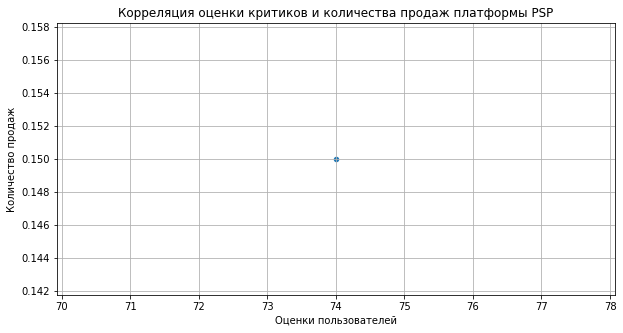

In [77]:
psp.plot(x='critic_score', y='general_sales', kind='scatter', grid=True, figsize = (10,5))
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.title('Корреляция оценки критиков и количества продаж платформы PSP');
plt.show()

#### Вывод: 
 Согласно полученным данным видно, что оценки критиков оказывают небольшое влияние на количество продаж, оценки же пользователем не играют особой роли в продажах (кроме платформ WiiU и DS).

### Посмотрим на общее распределение игр по жанрам
Создадим сводную таблицe с количеством проданных игр по жанрам и медианой сумм продаж. Будем рассматривать медианное значение, так как за высокими суммами продаж может скрывать множества недорогих игр с низкими продажами. А за низкими суммарными продажами в жанре может быть небольшое число высокодоходных игр. 

In [78]:
# создадим сводную таблицу:
genre_top = actual_data.pivot_table(index='genre', values='general_sales', aggfunc=['count', 'median'])

genre_top

,count,median
,general_sales,general_sales
genre,,
Action,1031,0.120
Adventure,302,0.030
Fighting,109,0.130
Misc,192,0.120
Platform,85,0.210
Puzzle,28,0.045
Racing,115,0.140
Role-Playing,370,0.140


In [79]:
# изменим название столбцов и отсортируем талицу по количеству продаж:
genre_top.columns = ['count', 'median']

In [80]:
genre_top = genre_top.sort_values(by='count')
genre_top

,count,median
genre,,
Puzzle,28,0.045
Strategy,71,0.080
Simulation,80,0.120
Platform,85,0.210
Fighting,109,0.130
Racing,115,0.140
Misc,192,0.120
Shooter,235,0.440
Sports,268,0.240


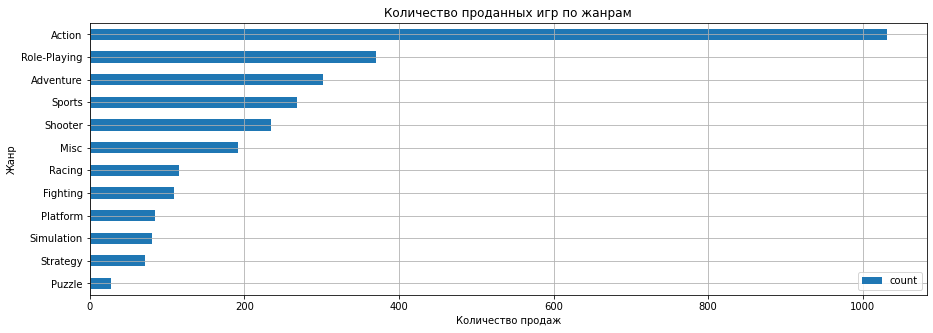

In [81]:
genre_top.plot(kind='barh', y='count', figsize=(15, 5), title = 'Количество проданных игр по жанрам', grid='True')
plt.xlabel('Количество продаж')
plt.ylabel('Жанр')
plt.show()

In [82]:
genre_top = genre_top.sort_values(by='median')

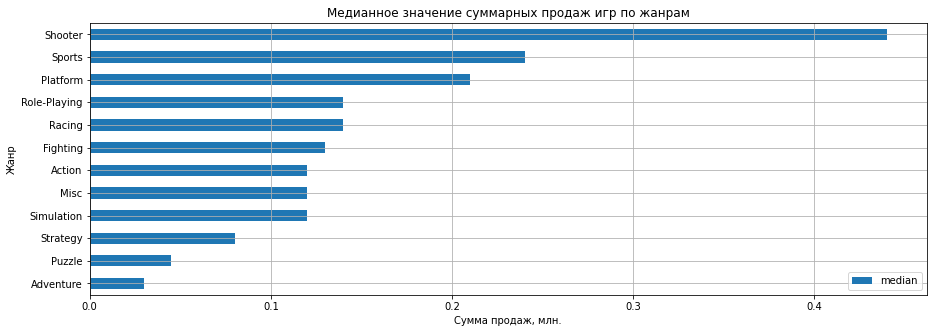

In [83]:
genre_top.plot(kind='barh', y='median', figsize=(15, 5), title = 'Медианное значение суммарных продаж игр по жанрам', grid='True')
plt.xlabel('Сумма продаж, млн.')
plt.ylabel('Жанр')
plt.show()

#### Вывод:
* Наибольшее количество продаж игр в жанре Action (1031), данный жанр является самым популярным; 
* Наименьшее количество продаж игр в жанре Puzzle (28), данный жанр является самым непопулярным;
* Самыми прибыльными являются игры в жанре Shooter (медиана суммарных продаж - 0.44 млн), а так же Sports (0.24 млн)  и Platform (0.21 млн)

## Составим портрет пользователя каждого региона

Мы имеем данные о таких регионах, как: Северная Америка (NA_sales), Европа (EU_sales) и Япония (JP_sales).


### Определим ТОП-5 платформ в регионах:

#### Выпишем интересующие нас регионы в отдельный список:

In [84]:
region = ['na_sales', 'eu_sales', 'jp_sales']

#### Напишем цикл, с помощью которого сгруппируем актуальные данные (actual_data) по названию платформы и подсчитаем продажи. Далее передадим эту информацию параметру axes для построения графиков:

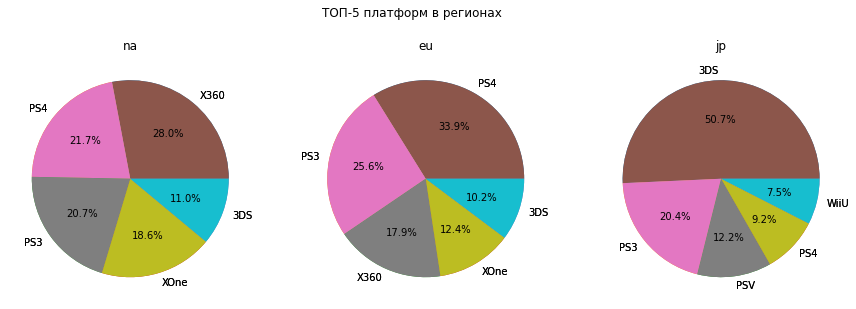

In [85]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах')

# создадим цикл, который переберет все строки с интересующими нас регионами (список region), сгруппируем данные по платформе,
# суммируем продажи и отсортируем по убыванию, возьмем первые 5 значений:
for i in range(3):
    top_platform_region = (actual_data.groupby('platform')[region[i]].sum().
             reset_index().
             sort_values(region[i], ascending = False, ignore_index = True).
             head(5))

# передадим данные параметру axes:
    axes[i].pie(top_platform_region[region[i]], labels = top_platform_region['platform'])
    axes[i].pie(top_platform_region[region[i]], labels = top_platform_region['platform'], autopct='%1.1f%%')
# добавим название региона:
    axes[i].set_title(top_platform_region.columns[1].split('_')[0])
plt.show()

#### Вывод:
Предпочтения в платформах в зависимости от региона разнятся:
* в Северной Америке лидируют платформы X360 (28%) и PS4 (21.7%);
* в Европе предпочтительными оказываются платформы PS4 (33.9%) и PS3 (25.6%);
* в Японии лидируют 3DS (50.7%) и PS3 (20.4%)

### Определим ТОП-5 жанров в регионах:

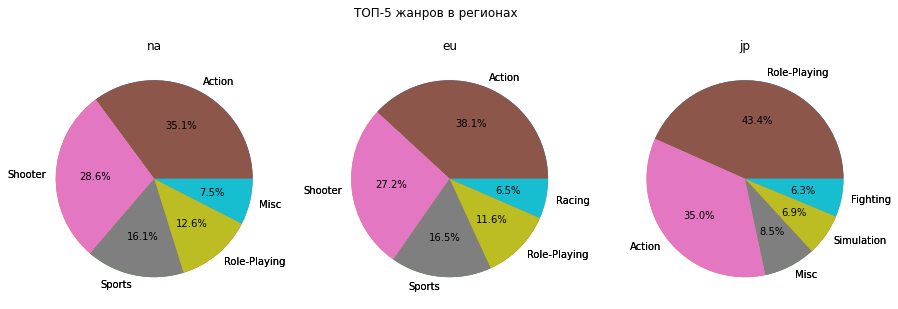

In [86]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')

# создадим цикл, который переберет все строки с интересующими нас регионами (список region), сгруппируем данные по жанру,
# суммируем продажи и отсортируем по убыванию, возьмем первые 5 значений:
for i in range(3):
    top_genre_region = (actual_data.groupby('genre')[region[i]].sum().
             reset_index().
             sort_values(region[i], ascending = False, ignore_index = True).
             head(5))

# передадим данные параметру axes:
    axes[i].pie(top_genre_region[region[i]], labels = top_genre_region['genre'])
    axes[i].pie(top_genre_region[region[i]], labels = top_genre_region['genre'], autopct='%1.1f%%')
# добавим название региона:
    axes[i].set_title(top_genre_region.columns[1].split('_')[0])
plt.show()

#### Вывод:
* Предпочтения в жанрах у Северной Америки и Европы схожи, лидируют Action (35.1% в Северной Америке и 38.1% в Европе) и Shooter (28.6% в Северной Америке и 27.2% в Европе).
* В японии же лидируют другие жанры: Role-Playing (43.4%) и Action (35.0%), а Shooter вовсе не входит в ТОП-5 жанров.

### Выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе

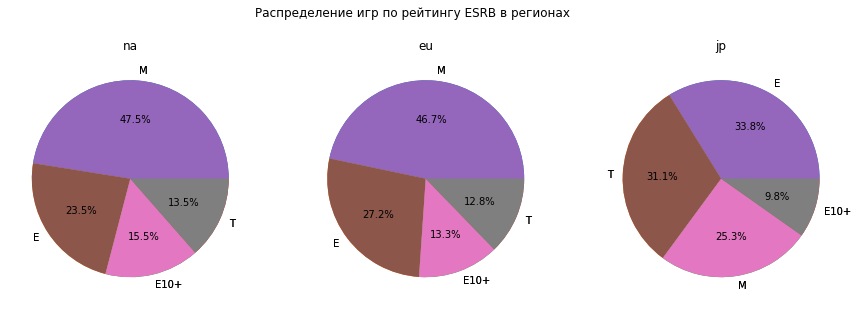

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Распределение игр по рейтингу ESRB в регионах')

# создадим цикл, который переберет все строки с интересующими нас регионами (список region), сгруппируем данные по рейтингу,
# суммируем продажи и отсортируем по убыванию, возьмем первые 5 значений:
for i in range(3):
    rating_region = (actual_data.groupby('rating')[region[i]].sum().
             reset_index().
             sort_values(region[i], ascending = False, ignore_index = True).
             head(5))

# передадим данные параметру axes:
    axes[i].pie(rating_region[region[i]], labels = rating_region['rating'])
    axes[i].pie(rating_region[region[i]], labels = rating_region['rating'], autopct='%1.1f%%')
# добавим название региона:
    axes[i].set_title(rating_region.columns[1].split('_')[0])
plt.show()

#### Вывод:
* Распределение по рейтингу игр практически идентичное у Северной Америки и Европы, на первом месте игры с рейтингом М (более 46%);
* в Японии же игры с рейтингом М продаются гораздо реже. Что, возможно связано с какими-либо ограничениями внутри страны;
* в Японии лидируют игры с рейтингом E (33.8%) и Т (31.1%).

### Вывод по пункту 4:
Согласно полученным данным, можно составить портрет пользователя отдельного региона:

* Пользовател из Северной Америки: предпочитает платформы X360 и PS4, игры жанра Action и Shooter, рейтинг игр М.
* Пользователь из Европы: предпочитает платформы PS4 и PS3, игры жанра Action и Shooter, рейтинг игр М.
* Пользователь из Японии: предпочитает платформы 3DS и PS3, игры жанра Role-Playing и Action, рейтинг игр Е и Т.


## Проверим гипотезы


### Проверим гипотезу о том, являются ли средние пользовательские рейтинги платформ Xbox One и PC одинаковыми

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные.

Обе гипотезы являются двусторонними, так как отклонение возможно как в большую, так и в меньшую стороны. Нам нужно сравнить средние двух генеральных совокупностей между собой, для этого используется метод scipy.stats.ttest_ind(array1, array2, equal_var, alternative). 

Так как выборки у нас разного размера, параметр equal_var указываем, как False, и тест посчитает дисперсии выборок по отдельности. Также добавим параметр nan_policy='omit', чтобы пропущенные значения NaN игнорировались и не мешали при рассчетах.

Пороговое значение ставим 0.05 (5%), так как данное значение является общепринятым.

#### Для начала выведем средний рейтинг пользователей для данных платформ:

In [88]:
print('Средний рейтинг пользователей платформ Xbox One:', actual_data.query('platform == "XOne"')['user_score'].mean())
print('Средний рейтинг пользователей платформ PC:', actual_data.query('platform == "PC"')['user_score'].mean())

Средний рейтинг пользователей платформ Xbox One: 6.521428571428572
Средний рейтинг пользователей платформ PC: 6.428640776699029


#### Гипотеза двустронняя, для её проверки применим t-тест: 

In [89]:
results = st.ttest_ind(
    actual_data.query('platform == "XOne"')['user_score'], 
    actual_data.query('platform == "PC"')['user_score'], 
    equal_var=False,
    nan_policy='omit'
)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134987
Не получилось отвергнуть нулевую гипотезу


#### Вывод:
 Нет оснований полагать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются.

### Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные
Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гиоптеза: средние пользовательские рейтинги жанров Action и Sports разные.

#### Выведем средний рейтинг пользователей для данных жанров:

In [90]:
print('Средний рейтинг пользователей жанра Action:', actual_data.query('genre == "Action"')['user_score'].mean())
print('Средний рейтинг пользователей жанра Sports:', actual_data.query('genre == "Sports"')['user_score'].mean())

Средний рейтинг пользователей жанра Action: 6.825047801147227
Средний рейтинг пользователей жанра Sports: 5.455897435897437


#### Гипотеза двустронняя, для её проверки применим t-тест: 

In [91]:
results = st.ttest_ind(
    actual_data.query('genre == "Action"')['user_score'], 
    actual_data.query('genre == "Sports"')['user_score'], 
    equal_var=False,
    nan_policy='omit'
)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


#### Вывод: 
Отвергаем нулевую гипотезу, так как средние пользовательские рейтинги игр в жанре Action и Sports не равны.

# Общий вывод:

В результате работы был проведен исследовательский анализ данных о продажах компьютерных игр интернет-магазина "Стримчик". 


### Был загружен файл с датафреймом:
* Датафрейм содержит 11 столбцов и 16715 строк.
* Пропущенные значения в столбцах: Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.
* Тип данных в столбцах: вещественные числа и строки.
* Данные предоставлены с 1980 г по 2016г.


### В результате предварительной обработки данных были выполнены следующие изменения:

* названия столбцов приведены к нижнему регистру;
* удалены пропуски в столбцах 'name' и 'genre';
* пропуски в столбце 'year_of_release' были оставлены, так как они не мешают дальнейшему анализу;
* в столбце 'user_score' нестандартное значение 'tbd' заменено на NaN;
* пропуски в столбцах 'critic_score', 'user_score' и 'rating' оставлены, так как процентное соотношение пропущенных значений очень высокое (более 40%), и при их заполнений можно исказить расчет корреляции;
* преобразован тип данных в стобцах: year_of_release в цельночисленный формат; user_score в тип данных float;
* подсчитаны суммарные продажи во всех регионах и данные занесены в новый столбец 'general sales'.


### В ходе исследовательского анализа выявлено:

* С 2002 года происходит резкое увеличение количества выпускаемых игр. Что, вероятно, связано с развитием технологий.
Наибольшее количество игр выпущено с 2005 по 2011 год (более 1000 игр в год). Пик приходится на 2008 и 2009 год (1427 и 1426 игр в год).
* После 2011 года происходит резкий спад количества выпущенных игр в год (653 игры в 2012, по сравнению с 1136 играми в 2011 году).
* Можно не рассматривать данные до 2002 года, так как количество выпущенных игр в год было крайне мало (менее 500 в год). Также 
* В ТОП-10 платформ, по суммарным количествам продаж входят: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC'.
* Каждая платформа существует примерно 10 лет, исключение составляет платформа PC, игры на которой выпускаются с 1992 года по 2016 год включительно (24 года).

#### Был выявлен актуальный период для исследований: 
жизненный цикл платформ составляет около 10 лет. Следовательно, данные, предотставленные за более поздний срок, являются неактуальными. Также, мы видим резкое уменьшение количества выпущенных игр после 2011 года, слeдовательно данные до 2011 года являются неактуальными для прогноза на 2017 год, так как они сильно разнятся с данными за последние 5 лет. Возьмем для анализа данные с 2012 года по 2016 год

После фильтрации датафрейма по актуальному периоду видим, что платформы, показывающие успешные показатели по продажам за 2012-2016 год значительно отличаются от тех, что лидируют по продажам за все время. Раньше лидерами по продажам были PS2 и X360, в актуальном периоде на лидирующих позициях PS4 и PS3.

#### Было выявлено, какие платформы лидируют по продажам, растут или падают:

* 3DC - продажи игр упали после 2013 года, на 2016 год продажи составляют около 15 млн;
* DS - в 2013 году продажи игр прекратились;
* PC - в 2012 году было продано 23 млн игр, после идет медленный спад продаж. Платформа выглядит стабильной, так как существует более 24 лет, но рост продаж маловероятен;
* PS3 - пик продаж пришелся на 2013 год (более 107 млн копий игр), после же следует резкий спад продаж в связи с тем, что данную платформу заменила PS4;
* PS4 - пик продаж в 2015(118 млн) году, на 2016 год виден спад (69 млн), но данные за 2016 год являются неполными, поэтому консоль выглядит потенциально прибыльной;
* PSP - продажи прекратились в 2015 году;
* PSV - продажи стабильно низкие (6 млн в 2015 году) и имеют постоянную тенденцию к снижению (16 млн в 2012г, 4 млн в 2016г);
* Wii - продажи в 2016 году близки к нулю (0.18 млн), платформа более не актуальна;
* X360 - после 2012 года идет резкий спад (98 млн в 2012г, 1.5 в 2016г), потеряла актуальность в связи с выходом новой версии консоли XOne;
* XOne - пик продаж в 2015 году (60 млн), данные за 2016 год неполные.

Две наиболее перспективные платформы:
* PS4
* XOne

#### В результате построения графика «ящик с усами» по глобальным продажам игр в разбивке по платформам видим, что:
* Имеется достаточное количество выбросов у всех платформ, наименьшее количество выбросов у платформ DS и Wii.
* Наибольший размах у платформ X360, PS4, XOne, Wii.
* Медиана продаж большинства платформ (PS3, X360, PS4, XOne, WiiU, Wii) находится на примерно одном уровне (0,2 миллиона проданных копий).
* Минимальная сумма продаж - 0.01 млн.
* Максимальная - 21.05 млн.

#### Были построены диаграммы рассеяния и посчитана корреляцию между отзывами и продажами на платформах:
Согласно полученным данным видно, что оценки критиков оказывают небольшое влияние на количество продаж, оценки же пользователем не играют особой роли в продажах (кроме платформ WiiU и DS).

#### Общее распределение игр по жанрам:
* Наибольшее количество продаж игр в жанре Action (1031), данный жанр является самым популярным;
* Наименьшее количество продаж игр в жанре Puzzle (28), данный жанр является самым непопулярным;
* Самыми прибыльными являются игры в жанре Shooter (медиана суммарных продаж - 0.44 млн), а так же Sports (0.24 млн) и Platform (0.21 млн)


### Портрет пользователя каждого региона:

* Пользователь из Северной Америки: предпочитает платформы X360 и PS4, игры жанра Action и Shooter, рейтинг игр М.
* Пользователь из Европы: предпочитает платформы PS4 и PS3, игры жанра Action и Shooter, рейтинг игр М.
* Пользователь из Японии: предпочитает платформы 3DS и PS3, игры жанра Role-Playing и Action, рейтинг игр Е и Т.

### проверка гипотез:
* Нет оснований полагать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются.
* Отвергаем нулевую гипотезу, так как средние пользовательские рейтинги игр в жанре Action и Sports не равны.


### В результате анализа были определены потенциально популярные продукты на 2017 год. Для планирования рекламной кампании я бы рекомендовала делать акцент на следующие продукты:
* Платформы: PS4, XOne
* Жанры: Action и Shooter (Для Северной Америки и Европы), и Role-Playing и Action (для Японии).

Было выявлено, что определяющие успешность игры закономерностями являются: 
* Выход на перспективных платформах (PS4, XOne).
* Жанр игр - Action и Shooter.
* Высокие оценки критиков (выше 80).


